In [13]:
import autograd.numpy as np_
from autograd import grad
import pandas as pd

# h = (G x t^2) / 2

df = pd.read_csv('jogadas.csv')

y_medido = df['Altura (cm)'].to_numpy()/100
x = df['T^2/2'].to_numpy()

def erro( parametros ):
    a, x, y_medido = parametros
    yhat = a * x
    mse = np_.mean( (yhat-y_medido)**2 ) # modifique esta linha!!
    return mse

g = grad(erro)


a_modelo = 0.0
a_list = []
alpha = 0.01
for _ in range(10000): # por 10 iterações...
    da, dx, dy = g( (a_modelo, x, y_medido) )
    a_modelo = a_modelo - alpha * da
    a_list.append( a_modelo )

print(a_modelo)

9.625346877285544


In [23]:
import autograd.numpy as np_
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt

# h = (G x t^2) / 2

df = pd.read_csv('jogadas.csv')

y_medido = df['Altura (cm)'].to_numpy()/100
x = df['T^2/2'].to_numpy()

def erro( parametros ):
    a, b, c, x, y_medido = parametros
    yhat = a * x + b * x ** 2 + c * x ** 3
    mse = np_.mean( (yhat-y_medido)**2 ) # modifique esta linha!!
    return mse

g = grad(erro)


a_modelo = 0.0
b_modelo = 0.0
c_modelo = 0.0
a_list = []
b_list = []
c_list = []
alpha = 0.1
for _ in range(100000): # por 10 iterações...
    da, db, dc, dx, dy = g( (a_modelo, b_modelo, c_modelo, x, y_medido) )
    a_modelo = a_modelo - alpha * da
    b_modelo = b_modelo - alpha * db
    c_modelo = c_modelo - alpha * dc
    a_list.append( a_modelo )
    b_list.append( b_modelo )
    c_list.append( c_modelo )

print(a_modelo)
print(b_modelo)
print(c_modelo)

16.725654286010233
-32.96923468259445
-13.132334974558432


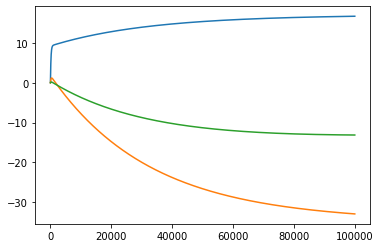

In [24]:
plt.figure()
plt.plot(a_list)
plt.plot(b_list)
plt.plot(c_list)
plt.show()

quanto melhor as medidas b e c vao pra 0, e quanto pior mais ele vai ter que usar b e c pra modelar 

perg da prova: 
X = AY
XY^-1 = A --> nao pode fazer isso pra descubrir A por que y não é inversível (isso ocorre por causa do formato dele, por ex n eh quadrada)
